In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt

In [4]:
plt.close('all')

## Object creation

In [5]:
s = pd.Series([1, 3, 5, np.nan, 6, 8])

In [6]:
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

In [7]:
dates = pd.date_range('20130101', periods=6)

In [8]:
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [9]:
df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list('ABCD'))

In [10]:
df

,A,B,C,D
2013-01-01,1.099381,1.220494,0.305217,0.664568
2013-01-02,-1.039814,-0.173253,-0.033734,-0.204648
2013-01-03,1.330614,1.006722,0.938462,-0.111540
2013-01-04,-1.086840,0.576897,0.574961,-0.472309
2013-01-05,0.208412,0.172020,-0.292093,0.159831
2013-01-06,0.568084,-0.721797,1.040427,-0.702922


In [11]:
df2 = pd.DataFrame({'A': 1.,
   ...:                     'B': pd.Timestamp('20130102'),
   ...:                     'C': pd.Series(1, index=list(range(4)), dtype='float32'),
   ...:                     'D': np.array([3] * 4, dtype='int32'),
   ...:                     'E': pd.Categorical(["test", "train", "test", "train"]),
   ...:                     'F': 'foo'})
   ...: 

In [12]:
df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


In [13]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

In [14]:
# df2.<TAB>

## Viewing data

In [15]:
df.head()

,A,B,C,D
2013-01-01,1.099381,1.220494,0.305217,0.664568
2013-01-02,-1.039814,-0.173253,-0.033734,-0.204648
2013-01-03,1.330614,1.006722,0.938462,-0.111540
2013-01-04,-1.086840,0.576897,0.574961,-0.472309
2013-01-05,0.208412,0.172020,-0.292093,0.159831


In [16]:
df.tail(3)

,A,B,C,D
2013-01-04,-1.086840,0.576897,0.574961,-0.472309
2013-01-05,0.208412,0.172020,-0.292093,0.159831
2013-01-06,0.568084,-0.721797,1.040427,-0.702922


In [17]:
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [18]:
df.to_numpy()

array([[ 1.09938075,  1.22049399,  0.30521741,  0.66456775],
       [-1.03981357, -0.17325325, -0.03373379, -0.20464781],
       [ 1.33061361,  1.00672248,  0.93846181, -0.11153988],
       [-1.08683998,  0.57689684,  0.57496087, -0.47230907],
       [ 0.20841186,  0.17202048, -0.29209295,  0.1598306 ],
       [ 0.56808422, -0.72179665,  1.04042668, -0.70292157]])

In [19]:
df2.to_numpy()

array([[1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'train', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'train', 'foo']],
      dtype=object)

In [20]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,0.179973,0.346847,0.422207,-0.111170
std,1.040521,0.734123,0.529876,0.482605
min,-1.086840,-0.721797,-0.292093,-0.702922
25%,-0.727757,-0.086935,0.051004,-0.405394
50%,0.388248,0.374459,0.440089,-0.158094
75%,0.966557,0.899266,0.847587,0.091988
max,1.330614,1.220494,1.040427,0.664568


In [21]:
df.T

,2013-01-01,2013-01-02,2013-01-03,2013-01-04,2013-01-05,2013-01-06
A,1.099381,-1.039814,1.330614,-1.086840,0.208412,0.568084
B,1.220494,-0.173253,1.006722,0.576897,0.172020,-0.721797
C,0.305217,-0.033734,0.938462,0.574961,-0.292093,1.040427
D,0.664568,-0.204648,-0.111540,-0.472309,0.159831,-0.702922


In [22]:
df.sort_index(axis=1, ascending=False)

,D,C,B,A
2013-01-01,0.664568,0.305217,1.220494,1.099381
2013-01-02,-0.204648,-0.033734,-0.173253,-1.039814
2013-01-03,-0.111540,0.938462,1.006722,1.330614
2013-01-04,-0.472309,0.574961,0.576897,-1.086840
2013-01-05,0.159831,-0.292093,0.172020,0.208412
2013-01-06,-0.702922,1.040427,-0.721797,0.568084


In [23]:
df.sort_values(by='B')

,A,B,C,D
2013-01-06,0.568084,-0.721797,1.040427,-0.702922
2013-01-02,-1.039814,-0.173253,-0.033734,-0.204648
2013-01-05,0.208412,0.172020,-0.292093,0.159831
2013-01-04,-1.086840,0.576897,0.574961,-0.472309
2013-01-03,1.330614,1.006722,0.938462,-0.111540
2013-01-01,1.099381,1.220494,0.305217,0.664568


## Selection
### Getting

In [24]:
df['A']

2013-01-01    1.099381
2013-01-02   -1.039814
2013-01-03    1.330614
2013-01-04   -1.086840
2013-01-05    0.208412
2013-01-06    0.568084
Freq: D, Name: A, dtype: float64

In [25]:
df[0:3]

,A,B,C,D
2013-01-01,1.099381,1.220494,0.305217,0.664568
2013-01-02,-1.039814,-0.173253,-0.033734,-0.204648
2013-01-03,1.330614,1.006722,0.938462,-0.111540


### Selection by label

In [26]:
df.loc[dates[0]]

A    1.099381
B    1.220494
C    0.305217
D    0.664568
Name: 2013-01-01 00:00:00, dtype: float64

In [27]:
df.loc[:, ['A', 'B']]

,A,B
2013-01-01,1.099381,1.220494
2013-01-02,-1.039814,-0.173253
2013-01-03,1.330614,1.006722
2013-01-04,-1.086840,0.576897
2013-01-05,0.208412,0.172020
2013-01-06,0.568084,-0.721797


In [28]:
df.loc['20130102':'20130104', ['A', 'B']]

,A,B
2013-01-02,-1.039814,-0.173253
2013-01-03,1.330614,1.006722
2013-01-04,-1.086840,0.576897


In [29]:
df.loc['20130102', ['A', 'B']]

A   -1.039814
B   -0.173253
Name: 2013-01-02 00:00:00, dtype: float64

In [30]:
df.loc[dates[0], 'A']

1.0993807519797167

In [31]:
df.at[dates[0], 'A']

1.0993807519797167

### Selection by position

In [32]:
df.iloc[3]

A   -1.086840
B    0.576897
C    0.574961
D   -0.472309
Name: 2013-01-04 00:00:00, dtype: float64

In [33]:
df.iloc[3:5, 0:2]

,A,B
2013-01-04,-1.086840,0.576897
2013-01-05,0.208412,0.172020


In [34]:
df.iloc[[1, 2, 4], [0, 2]]

,A,C
2013-01-02,-1.039814,-0.033734
2013-01-03,1.330614,0.938462
2013-01-05,0.208412,-0.292093


In [35]:
df.iloc[1:3, :]

,A,B,C,D
2013-01-02,-1.039814,-0.173253,-0.033734,-0.204648
2013-01-03,1.330614,1.006722,0.938462,-0.111540


In [36]:
df.iloc[:, 1:3]

,B,C
2013-01-01,1.220494,0.305217
2013-01-02,-0.173253,-0.033734
2013-01-03,1.006722,0.938462
2013-01-04,0.576897,0.574961
2013-01-05,0.172020,-0.292093
2013-01-06,-0.721797,1.040427


In [37]:
df.iloc[1, 1]

-0.1732532451515476

In [38]:
df.iat[1, 1]

-0.1732532451515476

## Boolean indexing

In [39]:
df[df.A > 0]

,A,B,C,D
2013-01-01,1.099381,1.220494,0.305217,0.664568
2013-01-03,1.330614,1.006722,0.938462,-0.111540
2013-01-05,0.208412,0.172020,-0.292093,0.159831
2013-01-06,0.568084,-0.721797,1.040427,-0.702922


In [40]:
df[df > 0]

,A,B,C,D
2013-01-01,1.099381,1.220494,0.305217,0.664568
2013-01-02,NaN,NaN,NaN,NaN
2013-01-03,1.330614,1.006722,0.938462,NaN
2013-01-04,NaN,0.576897,0.574961,NaN
2013-01-05,0.208412,0.172020,NaN,0.159831
2013-01-06,0.568084,NaN,1.040427,NaN


In [41]:
df2 = df.copy()

In [42]:
df2['E'] = ['one', 'one', 'two', 'three', 'four', 'three']

In [43]:
df2

,A,B,C,D,E
2013-01-01,1.099381,1.220494,0.305217,0.664568,one
2013-01-02,-1.039814,-0.173253,-0.033734,-0.204648,one
2013-01-03,1.330614,1.006722,0.938462,-0.111540,two
2013-01-04,-1.086840,0.576897,0.574961,-0.472309,three
2013-01-05,0.208412,0.172020,-0.292093,0.159831,four
2013-01-06,0.568084,-0.721797,1.040427,-0.702922,three


### Setting

In [44]:
s1 = pd.Series([1, 2, 3, 4, 5, 6], index=pd.date_range('20130102', periods=6))

In [45]:
s1

2013-01-02    1
2013-01-03    2
2013-01-04    3
2013-01-05    4
2013-01-06    5
2013-01-07    6
Freq: D, dtype: int64

In [46]:
df['F'] = s1

In [47]:
df.at[dates[0], 'A'] = 0

In [48]:
df.iat[0, 1] = 0

In [49]:
df.loc[:, 'D'] = np.array([5] * len(df))

In [50]:
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,0.305217,5,NaN
2013-01-02,-1.039814,-0.173253,-0.033734,5,1.0
2013-01-03,1.330614,1.006722,0.938462,5,2.0
2013-01-04,-1.086840,0.576897,0.574961,5,3.0
2013-01-05,0.208412,0.172020,-0.292093,5,4.0
2013-01-06,0.568084,-0.721797,1.040427,5,5.0


In [51]:
df2 = df.copy()

In [52]:
df2[df2 > 0] = -df2

In [53]:
df2

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.305217,-5,NaN
2013-01-02,-1.039814,-0.173253,-0.033734,-5,-1.0
2013-01-03,-1.330614,-1.006722,-0.938462,-5,-2.0
2013-01-04,-1.086840,-0.576897,-0.574961,-5,-3.0
2013-01-05,-0.208412,-0.172020,-0.292093,-5,-4.0
2013-01-06,-0.568084,-0.721797,-1.040427,-5,-5.0


### Missing data

In [54]:
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ['E'])

In [55]:
df1.loc[dates[0]:dates[1], 'E'] = 1

In [56]:
df1

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,0.305217,5,NaN,1.0
2013-01-02,-1.039814,-0.173253,-0.033734,5,1.0,1.0
2013-01-03,1.330614,1.006722,0.938462,5,2.0,NaN
2013-01-04,-1.086840,0.576897,0.574961,5,3.0,NaN


In [57]:
df1.dropna(how='any')

,A,B,C,D,F,E
2013-01-02,-1.039814,-0.173253,-0.033734,5,1.0,1.0


In [58]:
df1.fillna(value=5)

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,0.305217,5,5.0,1.0
2013-01-02,-1.039814,-0.173253,-0.033734,5,1.0,1.0
2013-01-03,1.330614,1.006722,0.938462,5,2.0,5.0
2013-01-04,-1.086840,0.576897,0.574961,5,3.0,5.0


In [59]:
pd.isna(df1)

,A,B,C,D,F,E
2013-01-01,False,False,False,False,True,False
2013-01-02,False,False,False,False,False,False
2013-01-03,False,False,False,False,False,True
2013-01-04,False,False,False,False,False,True


## Operations
### Stats

In [60]:
df.mean()

A   -0.003257
B    0.143432
C    0.422207
D    5.000000
F    3.000000
dtype: float64

In [61]:
df.mean(1)

2013-01-01    1.326304
2013-01-02    0.950640
2013-01-03    2.055160
2013-01-04    1.613004
2013-01-05    1.817668
2013-01-06    2.177343
Freq: D, dtype: float64

In [62]:
s = pd.Series([1, 3, 5, np.nan, 6, 8], index=dates).shift(2)

In [63]:
s

2013-01-01    NaN
2013-01-02    NaN
2013-01-03    1.0
2013-01-04    3.0
2013-01-05    5.0
2013-01-06    NaN
Freq: D, dtype: float64

In [64]:
df.sub(s, axis='index')

,A,B,C,D,F
2013-01-01,NaN,NaN,NaN,NaN,NaN
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,0.330614,0.006722,-0.061538,4.0,1.0
2013-01-04,-4.086840,-2.423103,-2.425039,2.0,0.0
2013-01-05,-4.791588,-4.827980,-5.292093,0.0,-1.0
2013-01-06,NaN,NaN,NaN,NaN,NaN


## Apply

In [65]:
df.apply(np.cumsum)

,A,B,C,D,F
2013-01-01,0.000000,0.000000,0.305217,5,NaN
2013-01-02,-1.039814,-0.173253,0.271484,10,1.0
2013-01-03,0.290800,0.833469,1.209945,15,3.0
2013-01-04,-0.796040,1.410366,1.784906,20,6.0
2013-01-05,-0.587628,1.582387,1.492813,25,10.0
2013-01-06,-0.019544,0.860590,2.533240,30,15.0


In [66]:
df.apply(lambda x: x.max() - x.min())

A    2.417454
B    1.728519
C    1.332520
D    0.000000
F    4.000000
dtype: float64

### Histogramming

In [67]:
s = pd.Series(np.random.randint(0, 7, size=10))

In [68]:
s


0    0
1    1
2    5
3    3
4    5
5    1
6    3
7    1
8    1
9    2
dtype: int32

In [69]:
s.value_counts()

1    4
5    2
3    2
2    1
0    1
dtype: int64

### String Methods

In [70]:
s = pd.Series(['A', 'B', 'C', 'Aaba', 'Baca', np.nan, 'CABA', 'dog', 'cat'])

In [71]:
s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

## Merge

### Concat

In [72]:
df = pd.DataFrame(np.random.randn(10, 4))

In [73]:
df

,0,1,2,3
0,0.372463,1.594205,0.942593,-0.548883
1,-1.609676,-1.273697,-0.651936,-0.351147
2,-1.055585,0.150240,-0.022970,0.300399
3,0.166219,0.979514,-1.553423,0.496705
4,2.307799,-0.053808,1.209325,1.346843
5,-1.689529,0.188379,-1.517596,0.185208
6,-0.803881,0.548595,-0.294446,-1.144998
7,1.612093,-0.499897,0.314127,0.803488
8,0.126013,-1.912093,0.575440,0.157120
9,0.891011,0.706189,-1.912091,1.028704


In [74]:
pieces = [df[:3], df[3:7], df[7:]]

In [75]:
pd.concat(pieces)

,0,1,2,3
0,0.372463,1.594205,0.942593,-0.548883
1,-1.609676,-1.273697,-0.651936,-0.351147
2,-1.055585,0.150240,-0.022970,0.300399
3,0.166219,0.979514,-1.553423,0.496705
4,2.307799,-0.053808,1.209325,1.346843
5,-1.689529,0.188379,-1.517596,0.185208
6,-0.803881,0.548595,-0.294446,-1.144998
7,1.612093,-0.499897,0.314127,0.803488
8,0.126013,-1.912093,0.575440,0.157120
9,0.891011,0.706189,-1.912091,1.028704


### Join

In [76]:
left = pd.DataFrame({'key': ['foo', 'foo'], 'lval': [1, 2]})

In [77]:
right = pd.DataFrame({'key': ['foo', 'foo'], 'rval': [4, 5]})

In [78]:
left

,key,lval
0,foo,1
1,foo,2


In [79]:
right


,key,rval
0,foo,4
1,foo,5


In [80]:
pd.merge(left, right, on='key')

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


In [81]:
left = pd.DataFrame({'key': ['foo', 'bar'], 'lval': [1, 2]})

In [82]:
right = pd.DataFrame({'key': ['foo', 'bar'], 'rval': [4, 5]})

In [83]:
left


,key,lval
0,foo,1
1,bar,2


In [84]:
right


,key,rval
0,foo,4
1,bar,5


In [85]:
pd.merge(left, right, on='key')

,key,lval,rval
0,foo,1,4
1,bar,2,5


### Append

In [86]:
df = pd.DataFrame(np.random.randn(8, 4), columns=['A', 'B', 'C', 'D'])

In [87]:
df

,A,B,C,D
0,-1.099661,0.544415,0.258830,-0.836524
1,-0.798779,-0.829130,-0.914904,1.763767
2,-0.124259,-0.161572,0.736970,0.565282
3,-0.307552,0.839685,-0.757765,-0.555473
4,0.222813,-0.781712,-0.338341,-0.510693
5,0.043541,0.120908,-0.590670,0.538383
6,-1.167677,-2.957073,-0.163185,0.483496
7,1.815846,0.812814,-0.976322,0.523160


In [88]:
s = df.iloc[3]

In [89]:
df.append(s, ignore_index=True)

,A,B,C,D
0,-1.099661,0.544415,0.258830,-0.836524
1,-0.798779,-0.829130,-0.914904,1.763767
2,-0.124259,-0.161572,0.736970,0.565282
3,-0.307552,0.839685,-0.757765,-0.555473
4,0.222813,-0.781712,-0.338341,-0.510693
5,0.043541,0.120908,-0.590670,0.538383
6,-1.167677,-2.957073,-0.163185,0.483496
7,1.815846,0.812814,-0.976322,0.523160
8,-0.307552,0.839685,-0.757765,-0.555473


## Grouping

In [90]:
df = pd.DataFrame({'A': ['foo', 'bar', 'foo', 'bar',
   ....:                          'foo', 'bar', 'foo', 'foo'],
   ....:                    'B': ['one', 'one', 'two', 'three',
   ....:                          'two', 'two', 'one', 'three'],
   ....:                    'C': np.random.randn(8),
   ....:                    'D': np.random.randn(8)})
   ....: 

In [91]:
df

,A,B,C,D
0,foo,one,0.452907,0.808869
1,bar,one,-1.842152,-0.864664
2,foo,two,0.332038,-1.446800
3,bar,three,1.322763,-0.681010
4,foo,two,-0.782348,0.472130
5,bar,two,0.992278,-1.530107
6,foo,one,-0.832658,-0.551465
7,foo,three,-0.368521,-1.010359


In [92]:
df.groupby('A').sum()

,C,D
A,,
bar,0.472889,-3.075782
foo,-1.198582,-1.727625


In [93]:
df.groupby(['A', 'B']).sum()

C         D
A   B                        
bar one   -1.842152 -0.864664
    three  1.322763 -0.681010
    two    0.992278 -1.530107
foo one   -0.379750  0.257404
    three -0.368521 -1.010359
    two   -0.450310 -0.974670

## Reshaping

### Stack

In [94]:
tuples = list(zip(*[['bar', 'bar', 'baz', 'baz',
   ....:                      'foo', 'foo', 'qux', 'qux'],
   ....:                     ['one', 'two', 'one', 'two',
   ....:                      'one', 'two', 'one', 'two']]))
   ....: 

In [95]:
index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])

In [96]:
df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=['A', 'B'])

In [97]:
df2 = df[:4]

In [98]:
df2

A         B
first second                    
bar   one    -1.123148  0.473269
      two     0.135416  0.073742
baz   one     0.053659  0.275381
      two     0.162617 -0.570243

In [99]:
stacked = df2.stack()

In [100]:
stacked

first  second   
bar    one     A   -1.123148
               B    0.473269
       two     A    0.135416
               B    0.073742
baz    one     A    0.053659
               B    0.275381
       two     A    0.162617
               B   -0.570243
dtype: float64

In [101]:
stacked.unstack()

A         B
first second                    
bar   one    -1.123148  0.473269
      two     0.135416  0.073742
baz   one     0.053659  0.275381
      two     0.162617 -0.570243

In [102]:
stacked.unstack(1)

second        one       two
first                      
bar   A -1.123148  0.135416
      B  0.473269  0.073742
baz   A  0.053659  0.162617
      B  0.275381 -0.570243

In [103]:
stacked.unstack(0)

first          bar       baz
second                      
one    A -1.123148  0.053659
       B  0.473269  0.275381
two    A  0.135416  0.162617
       B  0.073742 -0.570243

### Pivot tables

In [104]:
df = pd.DataFrame({'A': ['one', 'one', 'two', 'three'] * 3,
   .....:                    'B': ['A', 'B', 'C'] * 4,
   .....:                    'C': ['foo', 'foo', 'foo', 'bar', 'bar', 'bar'] * 2,
   .....:                    'D': np.random.randn(12),
   .....:                    'E': np.random.randn(12)})
   .....: 

In [105]:
df

,A,B,C,D,E
0,one,A,foo,-0.847663,-0.328028
1,one,B,foo,0.082316,-1.721367
2,two,C,foo,-0.000393,0.310369
3,three,A,bar,0.498200,-0.816671
4,one,B,bar,-0.688170,-0.995388
5,one,C,bar,1.124452,0.114879
6,two,A,foo,-1.134901,-1.125309
7,three,B,foo,-1.355655,1.617879
8,one,C,foo,1.340211,1.390726
9,one,A,bar,-0.284819,-0.336753


In [106]:
pd.pivot_table(df, values='D', index=['A', 'B'], columns=['C'])

C             bar       foo
A     B                    
one   A -0.284819 -0.847663
      B -0.688170  0.082316
      C  1.124452  1.340211
three A  0.498200       NaN
      B       NaN -1.355655
      C  0.216373       NaN
two   A       NaN -1.134901
      B -0.347077       NaN
      C       NaN -0.000393

## Time series

In [107]:
rng = pd.date_range('1/1/2012', periods=100, freq='S')

In [108]:
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)

In [109]:
ts.resample('5Min').sum()

2012-01-01    25914
Freq: 5T, dtype: int32

In [110]:
rng = pd.date_range('3/6/2012 00:00', periods=5, freq='D')

In [111]:
ts = pd.Series(np.random.randn(len(rng)), rng)

In [112]:
ts

2012-03-06    0.432995
2012-03-07   -0.827451
2012-03-08   -1.815451
2012-03-09    0.694747
2012-03-10   -0.750849
Freq: D, dtype: float64

In [113]:
ts_utc = ts.tz_localize('UTC')

In [114]:
ts_utc

2012-03-06 00:00:00+00:00    0.432995
2012-03-07 00:00:00+00:00   -0.827451
2012-03-08 00:00:00+00:00   -1.815451
2012-03-09 00:00:00+00:00    0.694747
2012-03-10 00:00:00+00:00   -0.750849
Freq: D, dtype: float64

In [115]:
ts_utc.tz_convert('US/Eastern')

2012-03-05 19:00:00-05:00    0.432995
2012-03-06 19:00:00-05:00   -0.827451
2012-03-07 19:00:00-05:00   -1.815451
2012-03-08 19:00:00-05:00    0.694747
2012-03-09 19:00:00-05:00   -0.750849
Freq: D, dtype: float64

In [116]:
rng = pd.date_range('1/1/2012', periods=5, freq='M')

In [117]:
ts = pd.Series(np.random.randn(len(rng)), index=rng)

In [118]:
ts


2012-01-31    1.186597
2012-02-29   -0.513325
2012-03-31   -0.354703
2012-04-30    0.151807
2012-05-31   -0.689583
Freq: M, dtype: float64

In [119]:
ps = ts.to_period()

In [120]:
ps


2012-01    1.186597
2012-02   -0.513325
2012-03   -0.354703
2012-04    0.151807
2012-05   -0.689583
Freq: M, dtype: float64

In [121]:
ps.to_timestamp()

2012-01-01    1.186597
2012-02-01   -0.513325
2012-03-01   -0.354703
2012-04-01    0.151807
2012-05-01   -0.689583
Freq: MS, dtype: float64

In [122]:
prng = pd.period_range('1990Q1', '2000Q4', freq='Q-NOV')

In [123]:
ts = pd.Series(np.random.randn(len(prng)), prng)

In [124]:
ts.index = (prng.asfreq('M', 'e') + 1).asfreq('H', 's') + 9

In [125]:
ts.head()

1990-03-01 09:00    1.443955
1990-06-01 09:00    1.633978
1990-09-01 09:00    0.193626
1990-12-01 09:00   -0.068935
1991-03-01 09:00   -0.547385
Freq: H, dtype: float64

## Categoricals

In [126]:
df = pd.DataFrame({"id": [1, 2, 3, 4, 5, 6],
   .....:                    "raw_grade": ['a', 'b', 'b', 'a', 'a', 'e']})
   .....: 

In [127]:
df["grade"] = df["raw_grade"].astype("category")

In [128]:
df["grade"]

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): [a, b, e]

In [129]:
df["grade"].cat.categories = ["very good", "good", "very bad"]

In [130]:
df["grade"] = df["grade"].cat.set_categories(["very bad", "bad", "medium",
   .....:                                               "good", "very good"])
   .....: 

In [131]:
df["grade"]

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (5, object): [very bad, bad, medium, good, very good]

In [132]:
df.sort_values(by="grade")

,id,raw_grade,grade
5,6,e,very bad
1,2,b,good
2,3,b,good
0,1,a,very good
3,4,a,very good
4,5,a,very good


In [133]:
df.groupby("grade").size()

grade
very bad     1
bad          0
medium       0
good         2
very good    3
dtype: int64

## Plotting

In [134]:
ts = pd.Series(np.random.randn(1000),
   .....:                index=pd.date_range('1/1/2000', periods=1000))
   .....: 

In [135]:
ts = ts.cumsum()

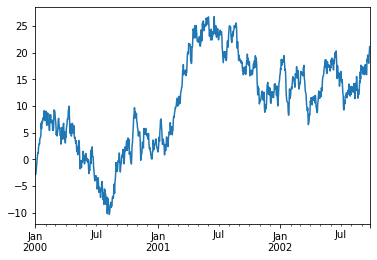

In [136]:
ts.plot()

In [137]:
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index,
   .....:                   columns=['A', 'B', 'C', 'D'])
   .....: 

In [138]:
df = df.cumsum()

In [139]:
plt.figure()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

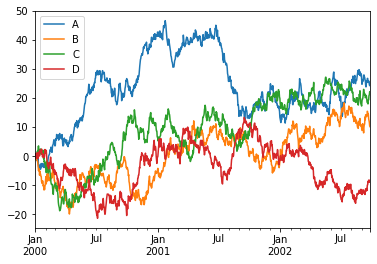

In [140]:
df.plot()

No handles with labels found to put in legend.


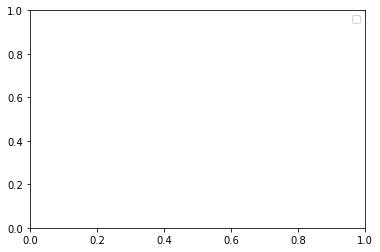

In [141]:
plt.legend(loc='best')

## Getting data in/out

### CSV

In [142]:
df.to_csv('foo.csv')

In [143]:
pd.read_csv('foo.csv')

,Unnamed: 0,A,B,C,D
0,2000-01-01,-0.927400,-0.078463,0.827492,0.710843
1,2000-01-02,0.526377,-0.987140,0.597718,0.921385
2,2000-01-03,-0.158159,-1.148143,0.968134,0.062050
3,2000-01-04,0.278587,-1.041214,-0.333661,-0.641874
4,2000-01-05,-1.178716,-1.027835,0.846983,-0.163557
...,...,...,...,...,...
995,2002-09-22,25.753583,12.927957,19.398084,-8.270270
996,2002-09-23,25.845012,12.250336,20.944886,-8.126090
997,2002-09-24,24.685896,11.711658,21.121363,-8.916060
998,2002-09-25,24.300624,10.416841,22.248864,-8.641439


### HDF5

In [144]:
df.to_hdf('foo.h5', 'df')

In [145]:
pd.read_hdf('foo.h5', 'df')

,A,B,C,D
2000-01-01,-0.927400,-0.078463,0.827492,0.710843
2000-01-02,0.526377,-0.987140,0.597718,0.921385
2000-01-03,-0.158159,-1.148143,0.968134,0.062050
2000-01-04,0.278587,-1.041214,-0.333661,-0.641874
2000-01-05,-1.178716,-1.027835,0.846983,-0.163557
...,...,...,...,...
2002-09-22,25.753583,12.927957,19.398084,-8.270270
2002-09-23,25.845012,12.250336,20.944886,-8.126090
2002-09-24,24.685896,11.711658,21.121363,-8.916060
2002-09-25,24.300624,10.416841,22.248864,-8.641439


### Excel

In [146]:
df.to_excel('foo.xlsx', sheet_name='Sheet1')

In [147]:
pd.read_excel('foo.xlsx', 'Sheet1', index_col=None, na_values=['NA'])

,Unnamed: 0,A,B,C,D
0,2000-01-01,-0.927400,-0.078463,0.827492,0.710843
1,2000-01-02,0.526377,-0.987140,0.597718,0.921385
2,2000-01-03,-0.158159,-1.148143,0.968134,0.062050
3,2000-01-04,0.278587,-1.041214,-0.333661,-0.641874
4,2000-01-05,-1.178716,-1.027835,0.846983,-0.163557
...,...,...,...,...,...
995,2002-09-22,25.753583,12.927957,19.398084,-8.270270
996,2002-09-23,25.845012,12.250336,20.944886,-8.126090
997,2002-09-24,24.685896,11.711658,21.121363,-8.916060
998,2002-09-25,24.300624,10.416841,22.248864,-8.641439
